Import libs

In [1]:
import numpy
import matplotlib.pyplot as plotlib
import librosa
import librosa.display
import IPython.display
import pandas

Load audio file

In [2]:
sfile, sr = librosa.load('kingsLoop.wav', mono=True, sr=None)

Import csv file into data frame

In [3]:
csv_data = pandas.read_csv('./SonicAnnotatorCSVs/kingsLoop_vamp_qm-vamp-plugins_qm-onsetdetector_onsets.csv', header=None)
csv_data

,0
0,0.011610
1,0.208980
2,0.417959
3,0.626939
4,0.835918
5,1.056508
6,1.265488
7,1.474467
8,1.695057
9,1.892426


Get times of all events in the csv

In [5]:
csv_times = csv_data.loc[:,0]
csv_times

0     0.011610
1     0.208980
2     0.417959
3     0.626939
4     0.835918
5     1.056508
6     1.265488
7     1.474467
8     1.695057
9     1.892426
10    2.113016
11    2.321995
12    2.530975
13    2.739955
14    2.960544
15    3.169524
16    3.378503
17    3.587483
18    3.796463
19    4.017052
20    4.214422
21    4.423401
22    4.643991
23    4.864580
24    5.073560
25    5.270930
26    5.491519
27    5.700499
28    5.909478
29    6.118458
30    6.339048
31    6.548027
Name: 0, dtype: float64

Get the audio file's frequency-domain info

In [6]:
mags_phases = librosa.stft(sfile, n_fft=4096)

Throw out the phase info and convert the amplitude info into dB

In [7]:
mags = numpy.abs(mags_phases)
mags_db = librosa.amplitude_to_db(mags, ref=numpy.max)

Plot the frequency info

Text(0.5, 1.0, 'Estimated from Sonic Visualiser')

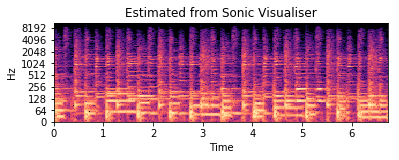

In [8]:
plotlib.figure()
spec_plot = plotlib.subplot(2, 1, 1)
librosa.display.specshow(mags_db, x_axis='time', y_axis='log')
plotlib.title('Estimated from Sonic Visualiser')

Plot the onsets from the csv

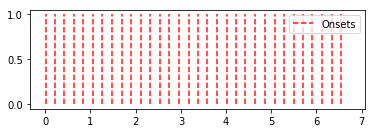

In [9]:
plotlib.subplot(2, 1, 2, sharex=spec_plot)
plotlib.vlines(csv_times, 0, 1, color='r', alpha=0.9, linestyle='--', label='Onsets')
plotlib.axis('tight')
plotlib.legend(frameon=True, framealpha=0.75)

Create audio of just clicks at the times from the csv file

In [10]:
# csv_times.values converts csv_times from a dataframe to an array
# librosa.time_to_samples converts that array of times-in-secs to an array of times-in-samps
onset_samp_locs = librosa.time_to_samples(csv_times.values, sr=sr)
# make a signal the length of yr soundfile, all zeros
onsets_sig = numpy.zeros(len(sfile))
# at each onset sample-location, change the zero to a 1
onsets_sig[onset_samp_locs] = 1
IPython.display.Audio(data=onsets_sig, rate=sr)

Create an audio file of the original audio file plus the clicks

In [11]:
sfile_onsets_sig = numpy.zeros((len(sfile), 2)) # 2-channel sfile, all zeros
sfile_onsets_sig[:,0] = sfile # left channel is sfile
sfile_onsets_sig[:,1] = onsets_sig # right channel is clicks
sfile_onsets_sig_mono = numpy.mean(sfile_onsets_sig, 1) # merge the channels

IPython.display.Audio(data=sfile_onsets_sig_mono, rate=sr)

Plot the csv's onsets alongside its detection function

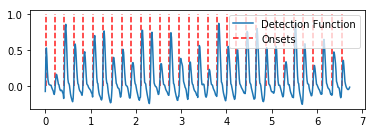

In [15]:
onsets_csv = pandas.read_csv('./SonicAnnotatorCSVs/kingsLoop_vamp_qm-vamp-plugins_qm-onsetdetector_onsets.csv', header=None)
onset_func_csv = pandas.read_csv('./SonicAnnotatorCSVs/kingsLoop_vamp_qm-vamp-plugins_qm-onsetdetector_smoothed_df.csv', header=None)

onset_times = onsets_csv.loc[:,0]
onset_func_times = onset_func_csv.loc[:,0]
onset_func_vals = onset_func_csv.loc[:,1]

plotlib.figure()
plotlib.subplot(2, 1, 1)
plotlib.vlines(onset_times, 0, 1, color='r', alpha=0.9, linestyle='--', label='Onsets')
plotlib.plot(onset_func_times, onset_func_vals, label='Detection Function')
plotlib.axis('tight') # arranges the graph to show all info
plotlib.legend(frameon=True, framealpha=0.75)

Plot loudness-related csv data

Text(0.5, 1.0, 'Loudness-related estimates')

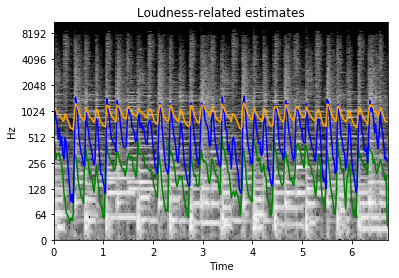

In [35]:
rms_csv = pandas.read_csv('./SonicAnnotatorCSVs/kingsLoop_vamp_bbc-vamp-plugins_bbc-energy_rmsenergy.csv', header=None)
rms_times = rms_csv.loc[:,0]
rms_vals = rms_csv.loc[:,1]

intensity_csv = pandas.read_csv('./SonicAnnotatorCSVs/kingsLoop_vamp_bbc-vamp-plugins_bbc-intensity_intensity.csv', header=None)
intensity_times = intensity_csv.loc[:,0]
intensity_vals = intensity_csv.loc[:,1]

loudness_csv = pandas.read_csv('./SonicAnnotatorCSVs/kingsLoop_vamp_vamp-libxtract_loudness_loudness.csv', header=None)
loudness_times = loudness_csv.loc[:,0]
loudness_vals = loudness_csv.loc[:,1]

librosa.display.specshow(mags_db, x_axis='time', y_axis='log', cmap='gray')
plotlib.plot(rms_times, rms_vals * 1000, color='g')
plotlib.plot(intensity_times, intensity_vals, color='b')
plotlib.plot(loudness_times, loudness_vals * 100, color='orange')
plotlib.title('Loudness-related estimates')

Define a function for plotting a spectrogram

In [50]:
def plotSpectrogram(file_path, mono=True, sr=None, n_fft=4096, n_rows=1, n_cols=1, subplot_n=1):
    sfile, sr = librosa.load(file_path, mono=mono, sr=sr)
    mags_phases = librosa.stft(sfile, n_fft=n_fft)
    mags = numpy.abs(mags_phases)
    mags_db = librosa.amplitude_to_db(mags, ref=numpy.max)
    spec_plot = plotlib.subplot(n_rows, n_cols, subplot_n)
    librosa.display.specshow(mags_db, x_axis='time', y_axis='log')

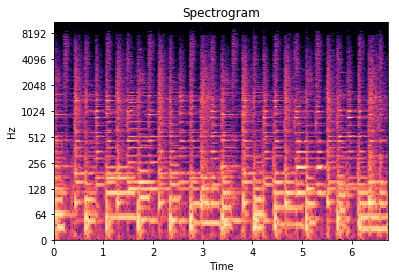

In [45]:
plotSpectrogram('kingsLoop.wav')

Define a function for plotting onsets and the onset detection function

In [46]:
def plotOnsets(onsets_path, detection_path, n_rows=1, n_cols=1, subplot_n=1):
    onsets_csv = pandas.read_csv(onsets_path, header=None)
    detection_csv = pandas.read_csv(detection_path, header=None)

    onset_times = onsets_csv.loc[:,0]
    detection_times = detection_csv.loc[:,0]
    detection_vals = detection_csv.loc[:,1]

    plotlib.subplot(n_rows, n_cols, subplot_n)
    plotlib.vlines(onset_times, 0, 1, color='r', alpha=0.9, linestyle='--', label='Onsets')
    plotlib.plot(detection_times, detection_vals, label='Detection Function')
    plotlib.axis('tight') # arranges the graph to show all info
    plotlib.legend(frameon=True, framealpha=0.75)

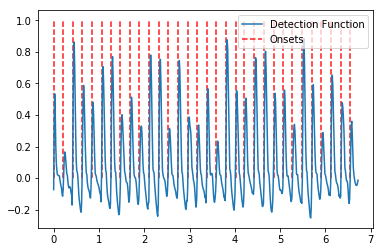

In [47]:
plotOnsets('./SonicAnnotatorCSVs/kingsLoop_vamp_qm-vamp-plugins_qm-onsetdetector_onsets.csv', './SonicAnnotatorCSVs/kingsLoop_vamp_qm-vamp-plugins_qm-onsetdetector_smoothed_df.csv')

Combine previous funcs into Onset Estimates func

In [56]:
def plotOnsets2(sfile_path, onsets_path, detection_path, mono=True, sr=None, n_fft=4096):
    plotlib.figure()
    plotlib.title("Onset Estimates for {!s}".format(sfile_path))
    plotSpectrogram('kingsLoop.wav', n_rows=2)
    plotOnsets(onsets_path, detection_path, n_rows=2, subplot_n=2)

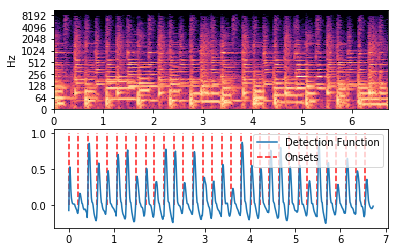

In [57]:
plotOnsets2('kingsLoop.wav', './SonicAnnotatorCSVs/kingsLoop_vamp_qm-vamp-plugins_qm-onsetdetector_onsets.csv', './SonicAnnotatorCSVs/kingsLoop_vamp_qm-vamp-plugins_qm-onsetdetector_smoothed_df.csv')